In [1]:
import sys
sys.path.append('../')
from cardiac_evalfunctions import *
import active_dynamicmemory.runutils as rutils

In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/m

In [3]:
round(4298/20), round(4298/10), round(4298/8), round(4298/5)  

(215, 430, 537, 860)

To see the dynamics during training validation curves can be plotted by calling `plot_validation_curves(<path_to_config_files>, [optional <list of method names>], [optional <list of random seeds>])`.
Note: Plotting those curves is only useful for methods trained on a continuous datastream

['Siemens', 'GE', 'Philips', 'Canon']


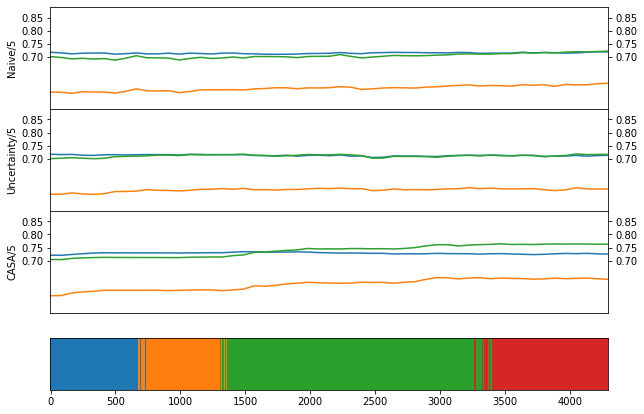

In [2]:
plot_validation_curves(['../training_configs/cardiac_naive_5.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',
                                '../training_configs/cardiac_casa_5.yml'], 
                               names=['Naive/5','Uncertainty/5', 'CASA/5'], seeds=[1, 2, 3, 4, 5])

To evaluate a specific config call `eval_config(<path_to_config_file>)`.

Results are cached to avoid recalculation.

In [4]:
eval_config('../training_configs/cardiac_base.yml')

,scanner,dice_lv,dice_myo,dice_rv,dice_mean
0,Canon,0.398034,0.361050,0.161379,0.302008
1,GE,0.772942,0.665817,0.735189,0.701991
2,Philips,0.819396,0.745160,0.786602,0.774186
3,Siemens,0.854722,0.773785,0.802222,0.799329


In [11]:
df = eval_config('../training_configs/cardiac_joint.yml', seeds=[1, 2, 3, 4, 5])
df.groupby('scanner').agg({'dice_lv': ['mean', 'std'], 'dice_myo': ['mean', 'std'], 'dice_rv': ['mean', 'std'], 'dice_mean': ['mean', 'std']})

dice_lv            dice_myo             dice_rv           dice_mean  \
             mean       std      mean       std      mean       std      mean   
scanner                                                                         
Canon    0.903992  0.012363  0.807224  0.017030  0.806337  0.020631  0.824549   
GE       0.815816  0.012184  0.735946  0.022814  0.796823  0.041845  0.757633   
Philips  0.868793  0.012049  0.793853  0.025845  0.850726  0.017319  0.817905   
Siemens  0.909274  0.005174  0.794061  0.006512  0.797823  0.033638  0.827749   

                   
              std  
scanner            
Canon    0.016153  
GE       0.020276  
Philips  0.022613  
Siemens  0.009223

In [38]:
eval_config('../training_configs/cardiac_naive_5.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.004847,0.003016,0.004740,NaN,0.004201,3
Canon,0.739659,0.643677,0.561608,0.637496,0.645610,3
FWT,0.102412,0.089595,0.092670,NaN,0.094892,3
GE,0.758320,0.655258,0.753680,0.694495,0.715438,3
Philips,0.824466,0.727272,0.806327,0.756009,0.778518,3
Siemens,0.888171,0.792459,0.799212,0.815509,0.823838,3


In [39]:
eval_config('../training_configs/cardiac_naive_8.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.004890,0.000861,0.000183,NaN,0.001978,3
Canon,0.747996,0.638267,0.505964,0.624578,0.629201,3
FWT,0.102820,0.089011,0.081220,NaN,0.091017,3
GE,0.754320,0.650379,0.738511,0.686953,0.707541,3
Philips,0.820293,0.719740,0.804950,0.751547,0.774133,3
Siemens,0.882590,0.788893,0.797726,0.811088,0.820074,3


In [42]:
eval_config('../training_configs/cardiac_naive_20.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.001407,-0.001335,0.000336,NaN,-0.000802,3
Canon,0.701574,0.617681,0.542512,0.610517,0.618071,3
FWT,0.085030,0.076260,0.087272,NaN,0.082854,3
GE,0.747850,0.646706,0.742037,0.684842,0.705359,3
Philips,0.789870,0.696412,0.797321,0.725982,0.752396,3
Siemens,0.882542,0.789185,0.798130,0.811625,0.820371,3


In [45]:
eval_config('../training_configs/cardiac_naive_10.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.005056,-0.005781,-0.000298,NaN,-0.003712,3
Canon,0.668783,0.579406,0.447344,0.560048,0.563895,3
FWT,0.066410,0.057738,0.057212,NaN,0.060453,3
GE,0.755860,0.648188,0.737679,0.686197,0.706981,3
Philips,0.800991,0.705737,0.803468,0.735647,0.761460,3
Siemens,0.882441,0.788702,0.795331,0.810425,0.819225,3


In [30]:
eval_config('../training_configs/cardiac_casa_20.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.006687,0.005323,0.000787,NaN,0.004266,3
Canon,0.462052,0.394091,0.217579,0.353024,0.356686,3
FWT,0.025432,0.039752,0.017294,NaN,0.027493,3
GE,0.829756,0.739424,0.753361,0.762412,0.771239,3
Philips,0.864894,0.799940,0.817920,0.822001,0.826189,3
Siemens,0.873955,0.775747,0.803640,0.807955,0.815324,3


In [36]:
eval_config('../training_configs/cardiac_casa_5.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.001616,-0.005078,-0.003854,NaN,-0.003516,3
Canon,0.865163,0.752654,0.726952,0.763785,0.777139,3
FWT,0.117124,0.125962,0.141214,NaN,0.128100,3
GE,0.838230,0.750322,0.765436,0.774207,0.782049,3
Philips,0.865144,0.808347,0.819769,0.825596,0.829714,3
Siemens,0.860750,0.754454,0.777750,0.788902,0.795464,3


In [34]:
eval_config('../training_configs/cardiac_casa_10.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.001591,-0.001765,-0.000931,NaN,-0.000368,3
Canon,0.789348,0.680364,0.591964,0.675363,0.684260,3
FWT,0.091677,0.100785,0.103867,NaN,0.098777,3
GE,0.834779,0.750087,0.772555,0.774480,0.782975,3
Philips,0.873532,0.813372,0.815859,0.829806,0.833142,3
Siemens,0.869346,0.766502,0.780850,0.797868,0.803642,3


In [35]:
eval_config('../training_configs/cardiac_casa_8.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.000776,-0.004950,-0.015385,NaN,-0.006520,3
Canon,0.866117,0.748658,0.702203,0.756050,0.768257,3
FWT,0.126673,0.129407,0.132956,NaN,0.129679,3
GE,0.835242,0.746624,0.750084,0.768334,0.775071,3
Philips,0.865420,0.805393,0.803881,0.820569,0.823816,3
Siemens,0.860933,0.754338,0.759321,0.784568,0.789790,3


In [59]:
eval_config('../training_configs/cardiac_uncertainty_5.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicess

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.013907,-0.030762,-0.016244,NaN,-0.020304,3
Canon,0.894118,0.777164,0.768269,0.792498,0.808012,3
FWT,0.074334,0.085918,0.132447,NaN,0.097566,3
GE,0.813018,0.705136,0.758203,0.740686,0.754261,3
Philips,0.851647,0.769582,0.797247,0.800485,0.804740,3
Siemens,0.823437,0.705242,0.733572,0.746151,0.752101,3


In [5]:
eval_config('../training_configs/cardiac_uncertainty_8.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_6c45967510
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_6c45967510.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_6c45967510.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_48db10f5d7
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_48db10f5d7.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_48db10f5d7.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicess

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.000536,-0.003399,-0.002602,NaN,-0.002179,3
Canon,0.758538,0.649420,0.534214,0.638966,0.645285,3
FWT,0.071265,0.061735,0.076117,NaN,0.069706,3
GE,0.741088,0.637135,0.741036,0.678328,0.699397,3
Philips,0.816085,0.716871,0.804613,0.748665,0.771558,3
Siemens,0.888460,0.789506,0.789207,0.811284,0.819614,3


To evaluate multiple configs at once and get an overview call `eval_config_list(<path_to_config_files>, <list of method names>, [optional <list of random seeds>])`

In [38]:
df_overview = eval_config_list(['../training_configs/cardiac_naive_5.yml', '../training_configs/cardiac_naive_8.yml', 
                                '../training_configs/cardiac_naive_10.yml', '../training_configs/cardiac_naive_20.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',
                                '../training_configs/cardiac_casa_5.yml',  '../training_configs/cardiac_casa_8.yml',  
                                '../training_configs/cardiac_casa_10.yml',  '../training_configs/cardiac_casa_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20', 'Uncertainty/5', 'CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
CASA/10,0.812,0.731,0.803,0.676,-0.006,0.086
CASA/20,0.824,0.741,0.785,0.379,0.002,0.019
CASA/5,0.807,0.716,0.803,0.778,-0.012,0.116
CASA/8,0.795,0.712,0.793,0.774,-0.017,0.119
Naive/10,0.819,0.707,0.761,0.564,-0.004,0.060
Naive/20,0.820,0.705,0.752,0.618,-0.001,0.083
Naive/5,0.824,0.715,0.779,0.646,0.004,0.095
Naive/8,0.820,0.708,0.774,0.629,0.002,0.091
Uncertainty/5,0.823,0.705,0.780,0.689,0.039,0.041


In [14]:
df_overview = eval_config_list(['../training_configs/cardiac_uncertainty_5_ri.yml',
                                '../training_configs/cardiac_uncertainty_5.yml'], 
                               ['Unc RI/5', 'Unc/5'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_50f8a2dae2
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_50f8a2dae2.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_50f8a2dae2.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicess

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
Unc RI/5,0.778,0.682,0.782,0.821,-0.024,0.097
Unc/5,0.823,0.705,0.780,0.689,0.039,0.041


In [15]:
with open('../training_configs/cardiac_uncertainty_5.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
model, logs, df_memory, exp_name = rutils.trained_model(params['trainparams'], params['settings'], training=False)

cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_a058d00fad.pt
True True


In [16]:
df_memory.groupby('scanner').count()

,filepath,pseudodomain,target
scanner,,,
Canon,2,0,2
Philips,1,0,1
Siemens,125,125,125


In [4]:
df_overview = eval_config_list(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_uncertainty.yml', '../training_configs/cardiac_casa.yml'], 
                               ['Naive', 'Uncertainty', 'DM'])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
DM,0.806,0.791,0.841,0.762,-0.001,0.114
Naive,0.806,0.750,0.801,0.570,0.009,0.082
Uncertainty,0.828,0.706,0.792,0.710,0.005,0.091


In [4]:
eval_config('../training_configs/cardiac_casa_5.yml') #transform, interval 100

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_d7b7bbb93e
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_d7b7bbb93e.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_d7b7bbb93e.pt
True True


,scanner,shift,dice_lv,dice_myo,dice_rv,dice_mean,mean
2,Canon,None,0.865764,0.757120,0.739560,0.772778,0.783806
6,GE,None,0.772458,0.667825,0.771372,0.709058,0.730178
10,Philips,None,0.841710,0.771114,0.818426,0.789845,0.805274
14,Siemens,None,0.907797,0.793269,0.797445,0.826001,0.831128
0,BWT,None,0.005927,0.002763,-0.000430,NaN,0.002753
1,FWT,None,0.098759,0.105199,0.133438,NaN,0.112465


In [8]:
eval_config('../training_configs/cardiac_casa_5.yml') #transform, interval 100

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_7691de61f1
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_7691de61f1.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_7691de61f1.pt
True True


,scanner,shift,dice_lv,dice_myo,dice_rv,dice_mean,mean
2,Canon,None,0.889367,0.791679,0.761247,0.801796,0.811022
6,GE,None,0.765948,0.619278,0.705967,0.673568,0.691190
10,Philips,None,0.857746,0.777999,0.816213,0.801629,0.813397
14,Siemens,None,0.891922,0.761256,0.762170,0.797293,0.803160
0,BWT,None,-0.000062,-0.027519,-0.028027,NaN,-0.018536
1,FWT,None,0.126740,0.133150,0.138004,NaN,0.132631


In [5]:
eval_config('../training_configs/cardiac_casa_20.yml')

,scanner,shift,dice_lv,dice_myo,dice_rv,dice_mean,mean
2,Canon,None,0.508671,0.445013,0.250893,0.401051,0.401407
6,GE,None,0.781358,0.678006,0.755462,0.711071,0.731474
10,Philips,None,0.813258,0.733193,0.815183,0.754660,0.779073
14,Siemens,None,0.911673,0.803986,0.813161,0.835408,0.841057
0,BWT,None,-0.000623,0.000135,-0.000627,NaN,-0.000371
1,FWT,None,-0.003793,-0.000316,0.000128,NaN,-0.001327


In [6]:
eval_config('../training_configs/cardiac_casa_20.yml')

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_471f22c0b0
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_471f22c0b0.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_471f22c0b0.pt
True True


,scanner,shift,dice_lv,dice_myo,dice_rv,dice_mean,mean
2,Canon,None,0.443285,0.368820,0.228886,0.349449,0.347610
6,GE,None,0.787684,0.688410,0.727997,0.712296,0.729097
10,Philips,None,0.816100,0.731909,0.808168,0.757000,0.778294
14,Siemens,None,0.905108,0.796090,0.802948,0.825609,0.832439
0,BWT,None,0.001362,0.000086,-0.003073,NaN,-0.000542
1,FWT,None,-0.010685,0.000551,-0.008941,NaN,-0.006358


# FINAL

In [4]:
df_overview = eval_config_list(['../training_configs/cardiac_naive_5.yml', '../training_configs/cardiac_naive_8.yml', 
                                '../training_configs/cardiac_naive_10.yml', '../training_configs/cardiac_naive_20.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',  '../training_configs/cardiac_uncertainty_8.yml',
                                 '../training_configs/cardiac_uncertainty_10.yml',  '../training_configs/cardiac_uncertainty_20.yml',
                                '../training_configs/cardiac_casa_5.yml',  '../training_configs/cardiac_casa_8.yml',  
                                '../training_configs/cardiac_casa_10.yml',  '../training_configs/cardiac_casa_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20', 'Uncertainty/5','Uncertainty/8', 'Uncertainty/10', 'Uncertainty/20', 'CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_c80e77afed
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_c80e77afed.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_c80e77afed.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_c0b79d0776
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_c0b79d0776.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_c0b79d0776.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicess

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
CASA/10,0.812,0.731,0.803,0.676,-0.006,0.086
CASA/20,0.824,0.741,0.785,0.379,0.002,0.019
CASA/5,0.807,0.716,0.803,0.778,-0.012,0.116
CASA/8,0.795,0.712,0.793,0.774,-0.017,0.119
Naive/10,0.819,0.707,0.761,0.564,-0.004,0.060
Naive/20,0.820,0.705,0.752,0.618,-0.001,0.083
Naive/5,0.824,0.715,0.779,0.646,0.004,0.095
Naive/8,0.820,0.708,0.774,0.629,0.002,0.091
Uncertainty/10,0.816,0.700,0.764,0.652,-0.003,0.067


In [17]:
with open('../training_configs/cardiac_casa_20.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    
memdir = params['settings']['TRAINED_MEMORY_DIR']

print(params['trainparams']['startbudget'])


for i in range(5):
    params['trainparams']['seed'] = i+1
    params['trainparams']['run_postfix'] = i+1

    expname = rutils.get_expname(params['trainparams'])

    df = pd.read_csv(f'{memdir}/{expname}.csv')
    print(df.groupby(['scanner']).count())
    
    print(df.groupby(['pseudodomain']).count())

    with open(f'{memdir}/{expname}.txt') as f:
        print(f.readlines())

215
         filepath  pseudodomain  target
scanner                                
GE             92            92      92
Siemens        36            36      36
              filepath  scanner  target
pseudodomain                           
0                   14       14      14
1                   18       18      18
2                   27       27      27
3                   15       15      15
4                   32       32      32
5                   22       22      22
['train counter: 153\n', 'label counter: 215']
         filepath  pseudodomain  target
scanner                                
GE             73            73      73
Siemens        55            55      55
              filepath  scanner  target
pseudodomain                           
0                   28       28      28
1                   26       26      26
2                   39       39      39
3                   35       35      35
['train counter: 138\n', 'label counter: 215']
         filepath  pse

In [21]:
with open('../training_configs/lidc_casa_20.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    
memdir = params['settings']['TRAINED_MEMORY_DIR']

print(params['trainparams']['startbudget'])


for i in range(5):
    params['trainparams']['seed'] = i+1
    params['trainparams']['run_postfix'] = i+1

    expname = rutils.get_expname(params['trainparams'])

    df = pd.read_csv(f'{memdir}/{expname}.csv')
    print(df.groupby(['scanner']).count())
    
    print(df.groupby(['pseudodomain']).count())

    with open(f'{memdir}/{expname}.txt') as f:
        print(f.readlines())

44
         filepath  pseudodomain  target
scanner                                
geb            36            36      36
ges            92            92      92
              filepath  scanner  target
pseudodomain                           
0                   84       84      84
1                    8        8       8
2                   36       36      36
['train counter: 19\n', 'label counter: 44']
         filepath  pseudodomain  target
scanner                                
geb            17            17      17
ges           111           111     111
              filepath  scanner  target
pseudodomain                           
0                   84       84      84
1                   27       27      27
2                   17       17      17
['train counter: 29\n', 'label counter: 44']
         filepath  pseudodomain  target
scanner                                
geb            29            29      29
ges            99            99      99
              filepath  sca